In [1]:
# Import required libraries
%matplotlib inline
import numpy as np
import yfinance as yf
from arch import arch_model

import matplotlib.pyplot as plt
plt.rc("figure", figsize=(16, 6))
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [2]:
# grab some data using the Yfinance API
name = (input("Enter ticker of your choice")).upper()
data = yf.download(name)

Enter ticker of your choice jpm


[*********************100%***********************]  1 of 1 completed


In [3]:
# Compute the simple returns and multiply by 100 to avoid the scaling warning from arch_model.

adjusted_closes = data['Adj Close']
returns = 100 * adjusted_closes.pct_change().dropna()

# Fit a GARCH model

In [4]:
# Fit GARCH model
# Calling arch_model like this does three things:
# - Uses a constant mean
# - Assumes a GARCH(1, 0, 1) volatility model
# - Uses a normal distribution for the standardized errors
model = arch_model(returns)

# After you define the model, fit it
# The library uses an iterative algorithm called maximum likelihood estimation to fit the model
# Details of each iteration prints to the screen.
res = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14570583353.59424
Iteration:      2,   Func. Count:     15,   Neg. LLF: 6378416911.736542
Iteration:      3,   Func. Count:     23,   Neg. LLF: 21831.777820433308
Iteration:      4,   Func. Count:     29,   Neg. LLF: 21807.195361538623
Iteration:      5,   Func. Count:     35,   Neg. LLF: 21935.177266139737
Iteration:      6,   Func. Count:     41,   Neg. LLF: 21727.511468120632
Iteration:      7,   Func. Count:     47,   Neg. LLF: 33645.31306489615
Iteration:      8,   Func. Count:     53,   Neg. LLF: 21779.575870873385
Iteration:      9,   Func. Count:     59,   Neg. LLF: 21720.399439131324
Iteration:     10,   Func. Count:     64,   Neg. LLF: 21720.39268112629
Iteration:     11,   Func. Count:     69,   Neg. LLF: 21720.38554217562
Iteration:     12,   Func. Count:     74,   Neg. LLF: 21720.385276272762
Iteration:     13,   Func. Count:     79,   Neg. LLF: 21720.385260829506
Iteration:     14,   Func. Count:     83,   Neg. LLF: 21

In [5]:
# Now that the model is fit, check the summary.
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -21720.4
Distribution:                  Normal   AIC:                           43448.8
Method:            Maximum Likelihood   BIC:                           43477.9
                                        No. Observations:                10778
Date:                Wed, Dec 14 2022   Df Residuals:                    10777
Time:                        08:35:49   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0925  1.549e-02      5.971  2.356e-09 [6.212e-0

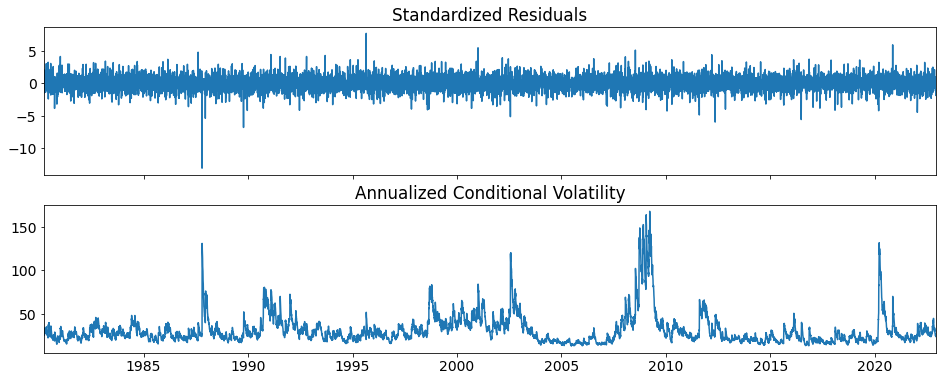

In [6]:
# visualize the standardized residuals and conditional volatility.
fig = res.plot("D")

# Save the figure.
plt.savefig(f"./Images/{name}StandardizedResidualsAndConditionalVolatility.jpg")

In [7]:
# Control the number of forecasts with the horizon argument. 
# The first forecast is used in this example.

# get the variance forecast
forecast = res.forecast(horizon=1, reindex=False)
variance_forecast = forecast.variance.iloc[-1][0]
print('Variance Forecast')
display(variance_forecast)

print()

# compute the annualized volatility forecast
# convert that to a volatility number, take the sqaure root. Then annualize it.
volatility_forecast = np.sqrt(variance_forecast)
print('Volatility Forecast')
display(volatility_forecast)

print()

annualized_volatility_forecast = volatility_forecast * np.sqrt(252) / 100
print('Annualized Volatility Forecast')
display(annualized_volatility_forecast)

Variance Forecast


2.127543771256592


Volatility Forecast


1.4586102190978205


Annualized Volatility Forecast


0.23154719397061613